In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [ ]:
#Loading data
df=pd.read_csv("/content/training_set.csv")

In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [ ]:
df.shape

(3910, 59)

In [ ]:
# checking datatype of variables
df.dtypes

Unnamed: 0      int64
X1            float64
X2            float64
X3            float64
X4            float64
X5            float64
X6            float64
X7            float64
X8            float64
X9            float64
X10           float64
X11           float64
X12           float64
X13           float64
X14           float64
X15           float64
X16           float64
X17           float64
X18           float64
X19           float64
X20           float64
X21           float64
X22           float64
X23           float64
X24           float64
X25           float64
X26           float64
X27           float64
X28           float64
X29           float64
X30           float64
X31           float64
X32           float64
X33           float64
X34           float64
X35           float64
X36           float64
X37           float64
X38           float64
X39           float64
X40           float64
X41           float64
X42           float64
X43           float64
X44           float64
X45       

**all variables are numerical**

In [ ]:
#checking for null valeus
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
X30           0
X31           0
X32           0
X33           0
X34           0
X35           0
X36           0
X37           0
X38           0
X39           0
X40           0
X41           0
X42           0
X43           0
X44           0
X45           0
X46           0
X47           0
X48           0
X49           0
X50           0
X51           0
X52           0
X53           0
X54           0
X55           0
X56           0
X57           0
Y             0
dtype: int64

**No null values**

In [ ]:
df.Y.value_counts()

0    2376
1    1534
Name: Y, dtype: int64

**Since the data is unbalanced we will oversample the minority class to balance the dataset**

In [ ]:
df_majority = df[df.Y==0]
df_minority = df[df.Y==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2376,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Y.value_counts()

1    2376
0    2376
Name: Y, dtype: int64

In [ ]:
Y=df_upsampled["Y"]
X=df_upsampled[df_upsampled.columns[1:58]]

In [ ]:
X.shape

(4752, 57)

In [ ]:
Y.value_counts()

1    2376
0    2376
Name: Y, dtype: int64

In [ ]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.0,0.0,4.34,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,1.342,0.0,0.0,1.200,2,12
2,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,8.10,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,2.70,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.0,0.0,1.000,1,5
5,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,1.08,0.0,1.08,0.0,0.0,0.0,0.00,0.00,1.08,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.0,0.0,1.263,4,24
7,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.91,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.45,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,16.7,0.0,0.00,0.000,0.066,0.000,0.000,0.0,0.0,2.284,19,329
8,0.0,0.0,0.19,0.0,0.19,0.19,0.0,0.0,0.0,0.19,0.0,0.38,0.0,0.0,0.0,0.0,0.0,0.38,1.54,0.0,0.96,0.0,0.0,0.0,2.69,1.54,0.77,0.57,0.19,1.15,0.19,0.19,0.0,0.19,0.57,0.38,0.38,0.0,0.0,0.19,0.38,0.0,0.38,0.0,0.38,0.0,0.0,0.19,0.026,0.404,0.053,0.026,0.0,0.0,2.894,45,411


In [ ]:
#Splitting data into train and test as 4:1
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

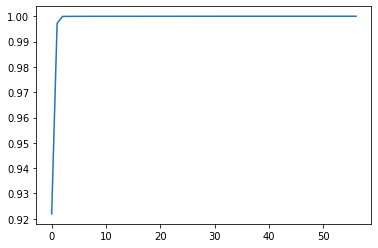

In [ ]:
# checking explained variance on unscaled data
pca=PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [ ]:
#Scalling of data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

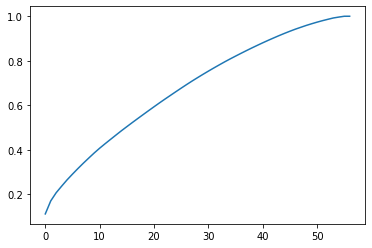

In [ ]:
#checking explained variance of scaled data
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [ ]:
####******** Building Machine learning models *******#####

# fuction to check the performance of the regression model using kfold cross validation on explained variance
# also checking the score with the training and test dataset
def predictions(classification_model, X_train, y_train, X_test, y_test):
    classification_model.fit(X_train, y_train)
    # here we are taking the k fold parameter as 10. It will divide the whole dataset into 10 equal parts and check performance taking each part one time as test data and other parts as training data
    y_pred = cross_val_predict(estimator=classification_model, X = X_train, y = y_train, cv = 10)
    y_pred2 = classification_model.predict(X_test)
    report_lr = precision_recall_fscore_support(y_train, y_pred, average='binary')
    report_lr2 = precision_recall_fscore_support(y_test, y_pred2, average='binary')
    print("training metrics")
    print ("\nprecision = %0.4f, recall = %0.4f, F1 = %0.4f, accuracy = %0.4f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_train, y_pred)))
    print("testing metrics")
    print ("\nprecision = %0.4f, recall = %0.4f, F1 = %0.4f, accuracy = %0.4f\n" % \
           (report_lr2[0], report_lr2[1], report_lr2[2], accuracy_score(y_test, y_pred2)))

In [ ]:
# Building models with metrics as precision, recall and F1 score
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=5),SVC(),DecisionTreeClassifier(max_depth=10,random_state=1),RandomForestClassifier(random_state=1),XGBClassifier(random_state=1)]
for model in models:
    print (model)
    predictions(model, X_train, y_train, X_test, y_test)
    print()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
training metrics

precision = 0.9289, recall = 0.9201, F1 = 0.9245, accuracy = 0.9245

testing metrics

precision = 0.9266, recall = 0.9266, F1 = 0.9266, accuracy = 0.9276


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
training metrics

precision = 0.9081, recall = 0.9162, F1 = 0.9121, accuracy = 0.9113

testing metrics

precision = 0.9103, recall = 0.9181, F1 = 0.9142, accuracy = 0.9150


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kern

**RandomForestClassifier performs best**

**Hyperparameter tuning for RandomForestClassifier**
Note : Avoid running this cell as it wil take quite time


In [ ]:
#        Hyperparameter tuning             #

# tuning Random Forest for dataset #

# from sklearn.model_selection import GridSearchCV
# # Random Forest hyperparameter tuning
# classifier = RandomForestClassifier(random_state=1)
# params = [{'n_estimators' : [100,400,500,700],'max_features':['auto', 'sqrt', 'log2'],
#            'min_samples_split':[2,4,6],'max_depth':[12,14,None],'min_samples_leaf':[1,2,3],
#            'random_state' :[1]}]
# grid_search = GridSearchCV(estimator=classifier, param_grid=params,cv = 5, n_jobs=-1, verbose=100)
# grid_search = grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

In [ ]:
estimator=RandomForestClassifier(max_depth=None,max_features='log2',min_samples_leaf=1,min_samples_split=2,n_estimators=700,random_state=1)

In [ ]:
#checking results with best parameters

In [ ]:
predictions(estimator,X_train,y_train,X_test,y_test)

training metrics

precision = 0.9688, recall = 0.9698, F1 = 0.9693, accuracy = 0.9691

testing metrics

precision = 0.9743, recall = 0.9710, F1 = 0.9726, accuracy = 0.9731



**Checking correlation between variables**

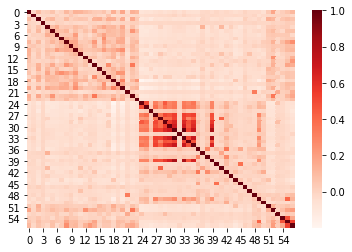

In [ ]:
#correlation matrix
corr_matrix=pd.DataFrame(X_train).corr()
sns.heatmap(corr_matrix,cmap = 'Reds')
plt.show()

In [ ]:
# List correlation between variables in decreasing order
c = pd.DataFrame(X_train).corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so=so[so>0.65]
so=so[so<1]
so

39  35    0.653729
35  39    0.653729
30  33    0.682832
33  30    0.682832
30  31    0.685801
31  30    0.685801
33  35    0.712769
35  33    0.712769
31  35    0.716204
35  31    0.716204
39  33    0.826842
33  39    0.826842
39  31    0.830493
31  39    0.830493
33  31    0.994887
31  33    0.994887
dtype: float64

In [ ]:
# extracting the list of variables to be dropped
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
X_train_dropped=pd.DataFrame(X_train).drop(to_drop, axis=1)
X_test_dropped=pd.DataFrame(X_test).drop(to_drop, axis=1)

In [ ]:
# Building models with metrics as precision, recall and F1 score
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=5),SVC(),DecisionTreeClassifier(max_depth=10,random_state=1),RandomForestClassifier(random_state=1),XGBClassifier(random_state=1)]
for model in models:
    print (model)
    predictions(model, X_train_dropped, y_train, X_test_dropped, y_test)
    print()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
training metrics

precision = 0.9290, recall = 0.9207, F1 = 0.9248, accuracy = 0.9248

testing metrics

precision = 0.9266, recall = 0.9266, F1 = 0.9266, accuracy = 0.9276


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
training metrics

precision = 0.9076, recall = 0.9168, F1 = 0.9122, accuracy = 0.9113

testing metrics

precision = 0.9073, recall = 0.9181, F1 = 0.9126, accuracy = 0.9133


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kern

**No significant changes in metrics**

In [ ]:
test_data=pd.read_csv("/content/test_set.csv")

In [ ]:
test_data.shape

(691, 58)

In [ ]:
test_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [ ]:
test_data=test_data[test_data.columns[1:58]]

In [ ]:
test_data.shape

(691, 57)

In [ ]:
test_data['Y']=estimator.predict(test_data)

In [ ]:
test_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89,0
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249,0
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040,1
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351,0
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249,0


In [ ]:
test_data.to_csv('submissions.csv',index=True)